In [1]:
import glob

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import time
import visa
from scipy.optimize import curve_fit

In [4]:
cd ..

/Users/APR1/Google Drive/COLUMBIA/S6/InterLab/radiometer


In [5]:
angleUncert = 1
date = "2016-11-18"
t = ""
files = glob.glob("Data/"+date+"_"+t+"*.txt")
files = ['Data/2016-11-18_15:51:06_Readout.txt', 'Data/2016-11-18_15:58:10_Readout.txt', 'Data/2016-11-18_16:00:09_Readout.txt', 'Data/2016-11-18_16:01:55_Readout.txt', 'Data/2016-11-18_16:03:40_Readout.txt', 'Data/2016-11-18_16:05:05_Readout.txt', 'Data/2016-11-18_16:06:18_Readout.txt', 'Data/2016-11-18_16:08:04_Readout.txt', 'Data/2016-11-18_16:09:37_Readout.txt', 'Data/2016-11-18_16:11:05_Readout.txt', 'Data/2016-11-18_16:12:46_Readout.txt', 'Data/2016-11-18_16:14:06_Readout.txt', 'Data/2016-11-18_16:15:30_Readout.txt', 'Data/2016-11-18_16:16:59_Readout.txt', 'Data/2016-11-18_16:18:26_Readout.txt', 'Data/2016-11-18_16:19:45_Readout.txt', 'Data/2016-11-18_16:21:04_Readout.txt', 'Data/2016-11-18_16:22:18_Readout.txt', 'Data/2016-11-18_16:23:32_Readout.txt', 'Data/2016-11-18_16:24:54_Readout.txt', 'Data/2016-11-18_16:26:27_Readout.txt', 'Data/2016-11-18_16:27:48_Readout.txt', 'Data/2016-11-18_16:29:45_Readout.txt', 'Data/2016-11-18_16:33:20_Readout.txt']
print(files)

['Data/2016-11-18_15:51:06_Readout.txt', 'Data/2016-11-18_15:58:10_Readout.txt', 'Data/2016-11-18_16:00:09_Readout.txt', 'Data/2016-11-18_16:01:55_Readout.txt', 'Data/2016-11-18_16:03:40_Readout.txt', 'Data/2016-11-18_16:05:05_Readout.txt', 'Data/2016-11-18_16:06:18_Readout.txt', 'Data/2016-11-18_16:08:04_Readout.txt', 'Data/2016-11-18_16:09:37_Readout.txt', 'Data/2016-11-18_16:11:05_Readout.txt', 'Data/2016-11-18_16:12:46_Readout.txt', 'Data/2016-11-18_16:14:06_Readout.txt', 'Data/2016-11-18_16:15:30_Readout.txt', 'Data/2016-11-18_16:16:59_Readout.txt', 'Data/2016-11-18_16:18:26_Readout.txt', 'Data/2016-11-18_16:19:45_Readout.txt', 'Data/2016-11-18_16:21:04_Readout.txt', 'Data/2016-11-18_16:22:18_Readout.txt', 'Data/2016-11-18_16:23:32_Readout.txt', 'Data/2016-11-18_16:24:54_Readout.txt', 'Data/2016-11-18_16:26:27_Readout.txt', 'Data/2016-11-18_16:27:48_Readout.txt', 'Data/2016-11-18_16:29:45_Readout.txt', 'Data/2016-11-18_16:33:20_Readout.txt']


In [6]:
# read header
headers = []
for f in files:
    with open(f,"r") as file: 
        header = []
        for line in file:
            if line.startswith("#"):
                header.append(line[2:])
        headers.append(header)
#print(headers)

In [7]:
# select files with no callibrator
unCalFiles = []
angleDicFiles = dict()
for h in headers:
    calLine = h[5].strip('\n')
    #print(calLine)
    if 'NO' in calLine.split(': ')[1]:
        #print(1)
        unCalFiles.append(h[0].strip('\n'))
        angle = h[4].strip('\n').split(': ')[1]
        #print(angle)
        if len(angle)==2: 
            if angle not in angleDicFiles:
                angleDicFiles[angle]=[h[0].strip('\n')]
            else:
                angleDicFiles[angle].append(h[0].strip('\n'))
print(angleDicFiles.keys())
print(angleDicFiles)

dict_keys(['80', '35', '60', '40', '65', '30', '10', '75', '70', '90', '25', '45', '50', '55', '85', '20'])
{'80': ['./Data/2016-11-18_16:26:27_Readout.txt'], '35': ['./Data/2016-11-18_16:06:18_Readout.txt'], '60': ['./Data/2016-11-18_16:18:26_Readout.txt'], '40': ['./Data/2016-11-18_16:09:37_Readout.txt'], '65': ['./Data/2016-11-18_16:19:45_Readout.txt'], '30': ['./Data/2016-11-18_16:05:05_Readout.txt'], '10': ['./Data/2016-11-18_15:51:06_Readout.txt'], '75': ['./Data/2016-11-18_16:23:32_Readout.txt'], '70': ['./Data/2016-11-18_16:22:18_Readout.txt'], '90': ['./Data/2016-11-18_16:33:20_Readout.txt'], '25': ['./Data/2016-11-18_16:01:55_Readout.txt'], '45': ['./Data/2016-11-18_16:11:05_Readout.txt'], '50': ['./Data/2016-11-18_16:14:06_Readout.txt'], '55': ['./Data/2016-11-18_16:15:30_Readout.txt'], '85': ['./Data/2016-11-18_16:27:48_Readout.txt'], '20': ['./Data/2016-11-18_16:00:09_Readout.txt']}


In [8]:
angles = np.linspace(20,90,(90-20)/5+1)
cmap = plt.get_cmap('spectral')
colors = [cmap(i) for i in np.linspace(0, 1, len(angles))]
print(angles)
print(colors)

[ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.]
[(0.0, 0.0, 0.0, 1.0), (0.49412352941176468, 0.0, 0.56076470588235294, 1.0), (0.094111764705882395, 0.0, 0.65492941176470587, 1.0), (0.0, 0.10981176470588236, 0.86670000000000003, 1.0), (0.0, 0.56340784313725489, 0.86670000000000003, 1.0), (0.0, 0.66669999999999996, 0.64839019607843129, 1.0), (0.0, 0.63008039215686273, 0.24050784313725487, 1.0), (0.0, 0.73853137254901957, 0.0, 1.0), (0.0, 0.92681568627450983, 0.0, 1.0), (0.63265098039215517, 1.0, 0.0, 1.0), (0.95160980392156869, 0.89670784313725493, 0.0, 1.0), (1.0, 0.6470588235294118, 0.0, 1.0), (0.97647647058823528, 0.0, 0.0, 1.0), (0.82746470588235299, 0.0, 0.0, 1.0), (0.80000000000000004, 0.80000000000000004, 0.80000000000000004, 1.0)]


[84.816072026800654, 83.506683417085441, 82.5302510460251, 82.093042749371335, 81.62637353433837, 81.262818791946302, 81.08552013422819, 80.828609715242877, 80.734259414225946, 80.672870292887012, 80.668812709030092, 80.722372170997474, 80.681298157453938, 80.635540653813919, 80.830317991631802]
[[0.043422255809402906], [0.04434207604811153], [0.04558797358652749], [0.043767031840137513], [0.044350868092674446], [0.04267412866832742], [0.042996776030014713], [0.043747142785889009], [0.043212228836242601], [0.042484108723809824], [0.043939701450557915], [0.042893919287978408], [0.043576381812645178], [0.05183373605128646], [0.044289643501494579]]


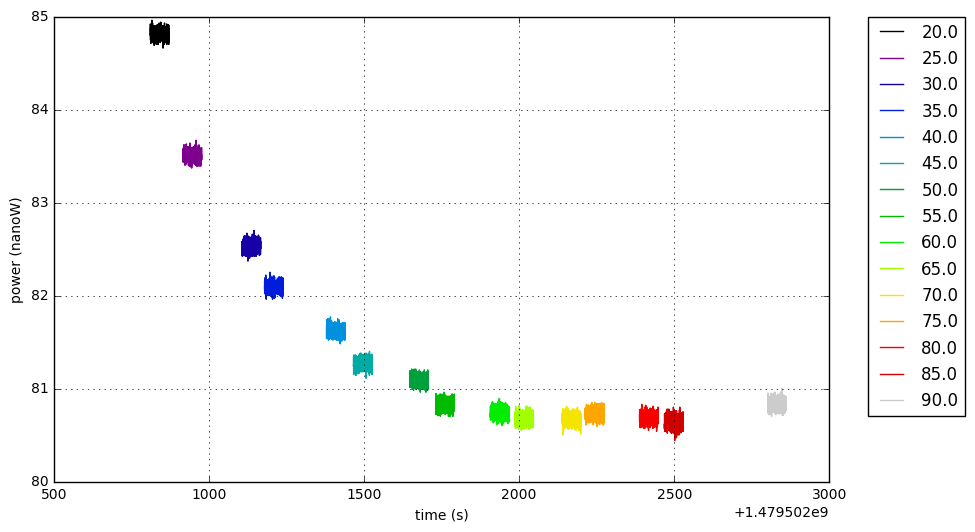

In [9]:
meanPowers = []
stdPowers = []
meanPower = []
stdPower = []
for i,angle in enumerate(angles, start=0):
    files = angleDicFiles[str(int(angle))]
    means = []
    stds = []
    for j, f in enumerate(files,start=0):
        data=np.loadtxt(f)
        if j == 0:
            plt.plot(data[:,0],-100*data[:,1], color=colors[i],label='{a}'.format(a=angle))
        else:
            plt.plot(data[:,0],-100* data[:,1], color=colors[i])
        means.append(np.mean(-100 * data[:,1]))
        stds.append(np.std(-100 *data[:,1])/sqrt(len(data[:1])))
    #print(means)
    meanPowers.append(means)  
    stdPowers.append(stds)
    meanPower.append(np.mean(means))
    stdPower.append(np.mean(stds))
print(meanPower)
print(stdPowers)
#stdPower = [x+0.005*100 for x in stdPower]
grid()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.ylabel('power (nanoW)')
plt.xlabel('time (s)')
plt.savefig('Figures/power_SkyDip1.png',bbox_inches='tight') 
plt.show()

In [64]:
Pcold = 78.5
Tcold = 3
Phot = 134.2
Thot = 14+273.15
G = (Phot-Pcold)/(Thot-Tcold)
Trec = (Pcold * Thot - Phot * Tcold)/(Phot-Pcold)
print(G,Trec)

#Pcold = 107
#Tcold = 150
#Phot = 134.2
#Thot = 14+273.15
#G = (Phot-Pcold)/(Thot-Tcold)
#Trec = (Pcold * Thot - Phot * Tcold)/(Phot-Pcold)
#print(G,Trec)

0.19602322716874887 397.4627468581688


In [67]:
G=0.196090771382 
Trec=397.180122203

meanTemp = [x/G - Trec for x in meanPower]
stdTemp = [x/G +0.5 for x in stdPower]

P(theta) =2.15051856992/(cos(90-theta))+78.3723218922


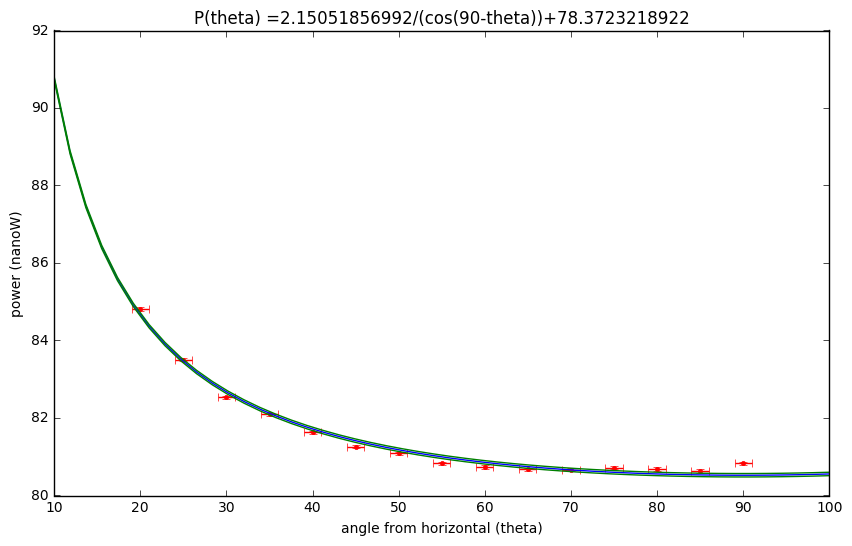

In [68]:
from scipy.optimize import curve_fit 
#angles = [90-x for x in angles]
#print(angles)

# choose the function to be fitted... 
def secant (x,a,b):
    return a/cos((90-x)*2*pi/360)+b

# exectute the curve fit...
coeffs, fiterr = curve_fit(secant, angles, meanPower)
zerothPower = coeffs[0]
highCoeffs, highFiterr = curve_fit(secant, angles, [meanPower[i]+stdPower[i] for i in range(len(meanPower))])
highZerothPower = highCoeffs[1]

lowCoeffs, lowFiterr = curve_fit(secant, angles, [meanPower[i]-stdPower[i] for i in range(len(meanPower))])
lowZerothPower = lowCoeffs[1]


# ...and plot the results
print ("P(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
plt.errorbar(angles,meanPower,xerr=angleUncert,yerr=stdPower, fmt='r.')
plt.plot(linspace(10,100),secant(linspace(10,100),*coeffs),'b')
plt.plot(linspace(10,100),secant(linspace(10,100),*lowCoeffs),'g')
plt.plot(linspace(10,100),secant(linspace(10,100),*highCoeffs),'g')
plt.ylabel('power (nanoW)')
plt.xlabel('angle from horizontal (theta)')
plt.title("P(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
plt.savefig('Figures/power+fit_angle.png',bbox_inches='tight') 
plt.show()

[2.9238044001630863, 2.3662015831524985, 1.9999999999999996, 1.7434467956210977, 1.5557238268604123, 1.4142135623730949, 1.3054072893322783, 1.2207745887614561, 1.1547005383792515, 1.1033779189624917, 1.0641777724759121, 1.035276180410083, 1.0154266118857451, 1.0038198375433474, 1.0]
P(theta) =2.2657860933/(cos(90-theta))+78.1251717803
78.1251717803 78.3275810892 78.4170625866


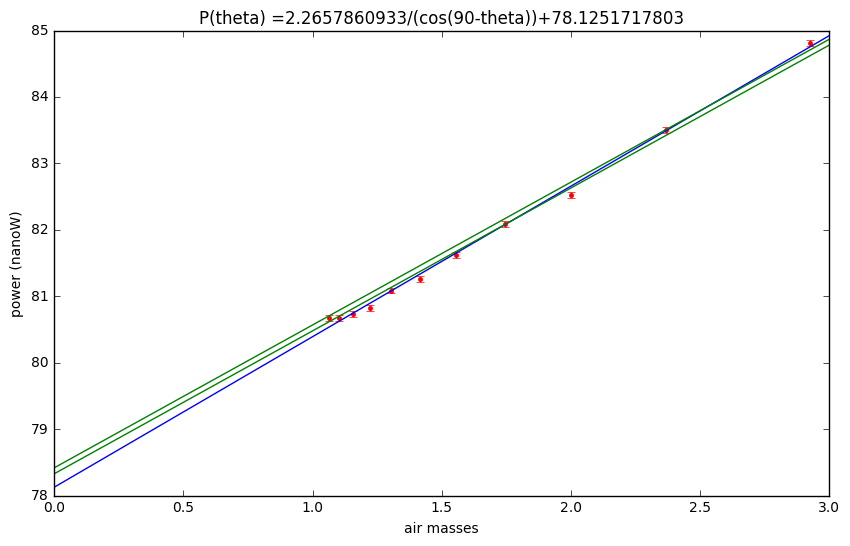

In [69]:
airMasses = [1/cos((90-x)*2*pi/360) for x in angles]
#print(len(airMasses), len(meanPower))
print(airMasses)

def linear (x,a,b):
    return [a*i+b for i in x]

# exectute the curve fit...
coeffs, fiterr = curve_fit(linear, airMasses[:-4], meanPower[:-4])
zerothPower = coeffs[1]
#print(linear(airMasses[2],*coeffs))
highCoeffs, highFiterr = curve_fit(linear, airMasses, [meanPower[i]+stdPower[i] for i in range(len(meanPower))])
highZerothPower = highCoeffs[1]

lowCoeffs, lowFiterr = curve_fit(linear, airMasses, [meanPower[i]-stdPower[i] for i in range(len(meanPower))])
lowZerothPower = lowCoeffs[1]

# ...and plot the results
print ("P(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
print(zerothPower,lowZerothPower,highZerothPower)
plt.errorbar(airMasses[:-4],meanPower[:-4],yerr=stdPower[:-4], fmt='r.')
plt.plot(linspace(0,3),linear(linspace(0,3),*coeffs),'b')
plt.plot(linspace(0,3),linear(linspace(0,3),*highCoeffs),'g')
plt.plot(linspace(0,3),linear(linspace(0,3),*lowCoeffs),'g')
#plt.axis([0,3,0,0.9])
plt.ylabel('power (nanoW)')
plt.xlabel('air masses')
plt.title("P(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
plt.savefig('Figures/power+fit_airMass.png',bbox_inches='tight') 
plt.show()

In [70]:
zerothTemp = zerothPower/(G) - Trec
lowZerothTemp = lowZerothPower/G -Trec
highZerothTemp = highZerothPower/G - Trec
print(zerothTemp,lowZerothTemp,highZerothTemp)

1.23318011453 2.26540262818 2.721729546


T(theta) =10.9669546028/(cos(90-theta))+2.49356622997


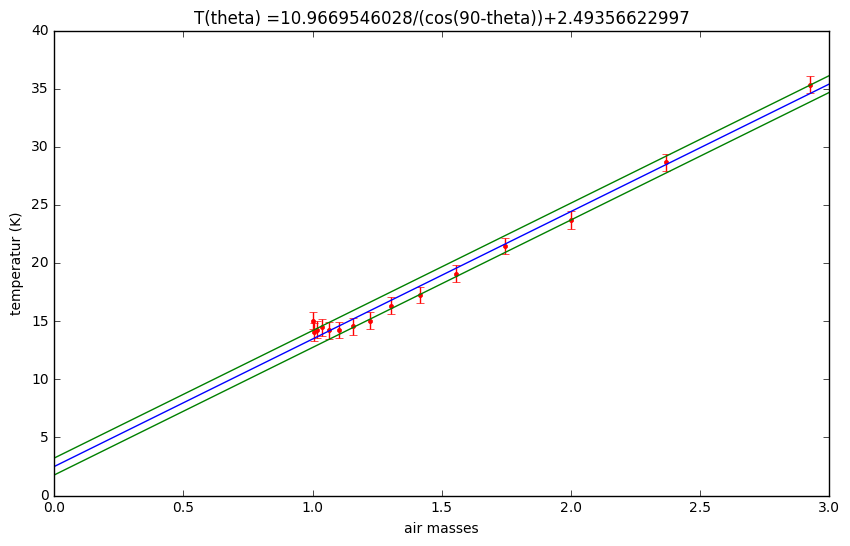

1.76540293644 2.49356622997 3.22172944985


In [71]:
coeffs, fiterr = curve_fit(linear, airMasses, meanTemp)
zerothTemp = coeffs[1]
#print(linear(airMasses[2],*coeffs))
highCoeffs, highFiterr = curve_fit(linear, airMasses, [meanTemp[i]+stdTemp[i] for i in arange(0,len(meanPower))])
highZerothTemp = highCoeffs[1]

lowCoeffs, lowFiterr = curve_fit(linear, airMasses, [meanTemp[i]-stdTemp[i] for i in arange(0,len(meanPower))])
lowZerothTemp = lowCoeffs[1]

# ...and plot the results
print ("T(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
#plt.plot(airMasses,meanTemp , '+')
plt.errorbar(airMasses,meanTemp,stdTemp, fmt='r.')
plt.plot(linspace(0,3),linear(linspace(0,3),*coeffs),'b')
plt.plot(linspace(0,3),linear(linspace(0,3),*highCoeffs),'g')
plt.plot(linspace(0,3),linear(linspace(0,3),*lowCoeffs),'g')
#plt.axis([0,3,0,288])
plt.ylabel('temperatur (K)')
plt.xlabel('air masses')
plt.title("T(theta) =%s/(cos(90-theta))+%s" % (coeffs[0],coeffs[1]))
plt.savefig('Figures/temp+fit_airMass.png',bbox_inches='tight') 
plt.show()
print(lowZerothTemp,zerothTemp,highZerothTemp)